# Question 2: Classification Problem Techconative


# Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('/content/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check Null Values

In [3]:
data.isnull().sum() #checking for total null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The **Age, Cabin and Embarked** have null values.

## Types Of Features

- **Categorical Features in the dataset: Sex, Embarked**

- **Ordinal Features in the dataset: PClass**

- **Continous Features in the dataset: Age, Fare**

- **Discrete Features in the dataset: SibSp, Parch**

### Survival Rate

Survival of the Passgener
`0 = No`

`1 = Yes`

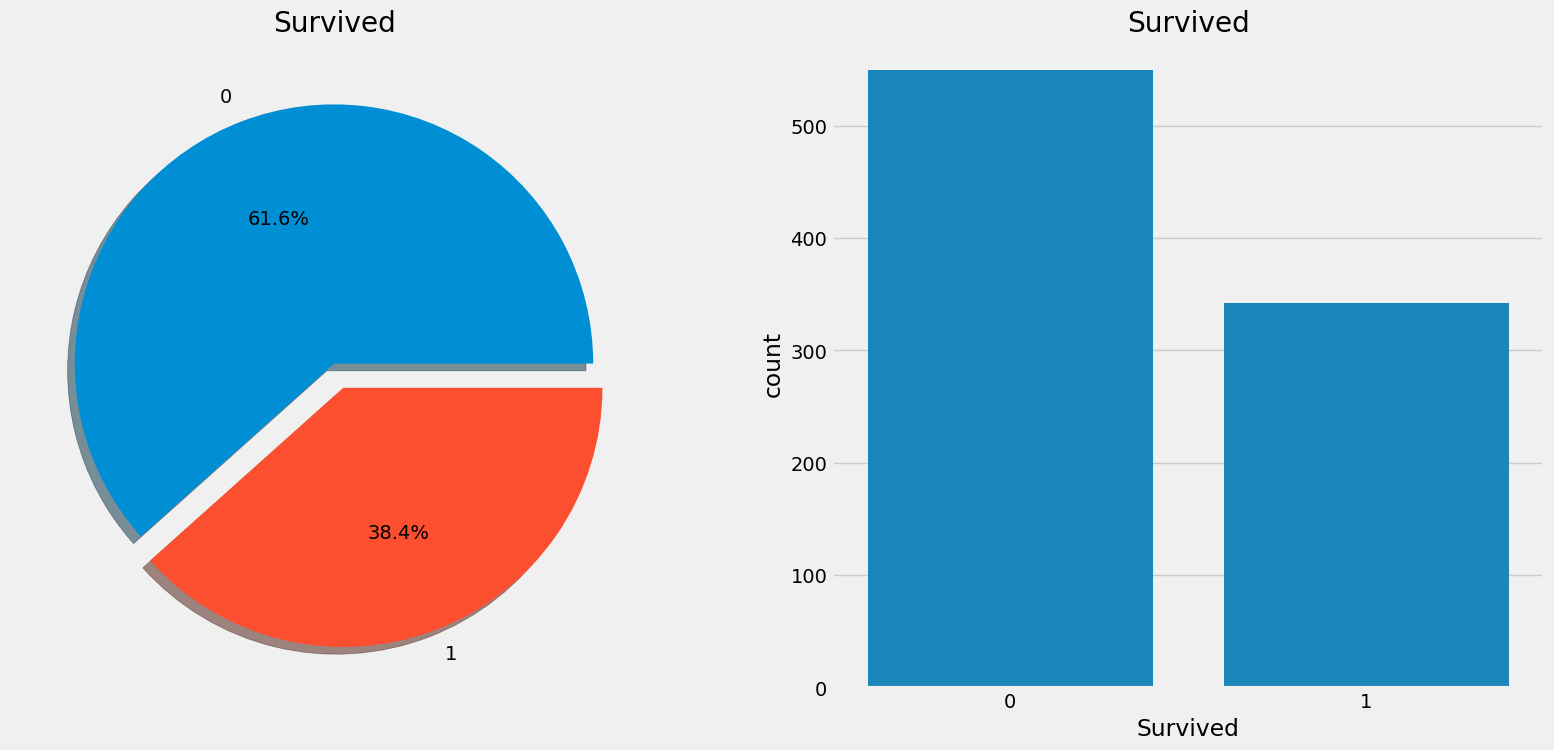

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

**Only about 38.4% of passengers in the training set survived**

### Sex - Categorical Feature

Indicates the Sex of the Passenger

`Male` or `Female`

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

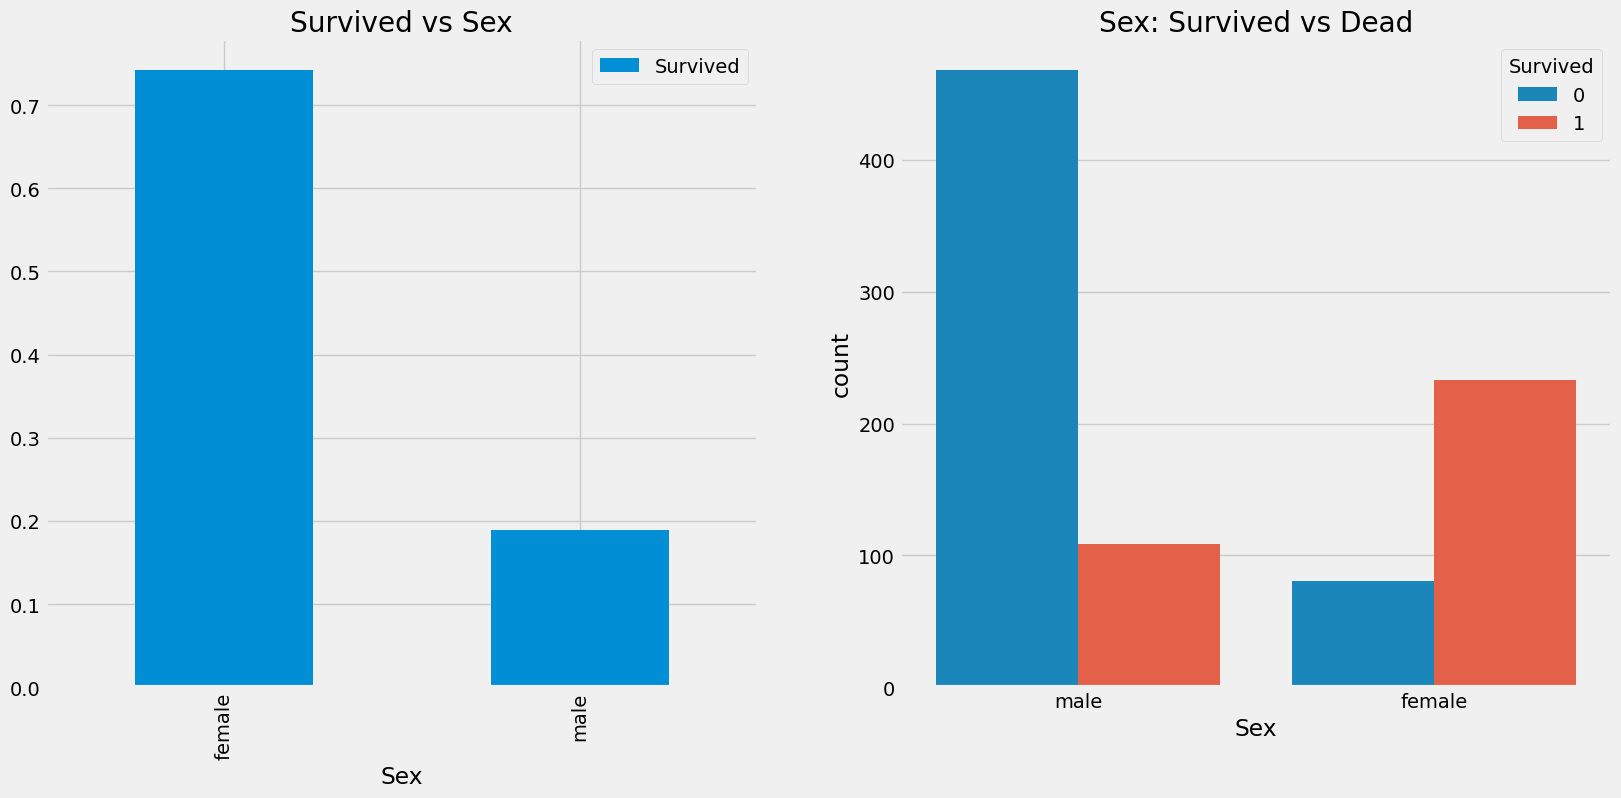

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- More men than women on the ship.
- Women saved: nearly twice the number of men saved.
- Women's survival rate: ~75%.
- Men's survival rate: ~18-19%.

### Embarked - Categorical Value

Port of Embarkation

- `C` = `Cherbourg`
- `Q` = `Queenstown`
- `S` = `Southampton`

In [35]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port Of Embarkation

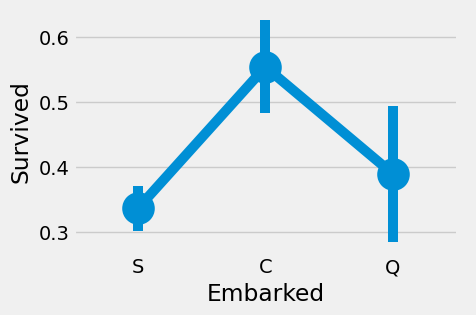

In [38]:
sns.catplot(x='Embarked',y='Survived',data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

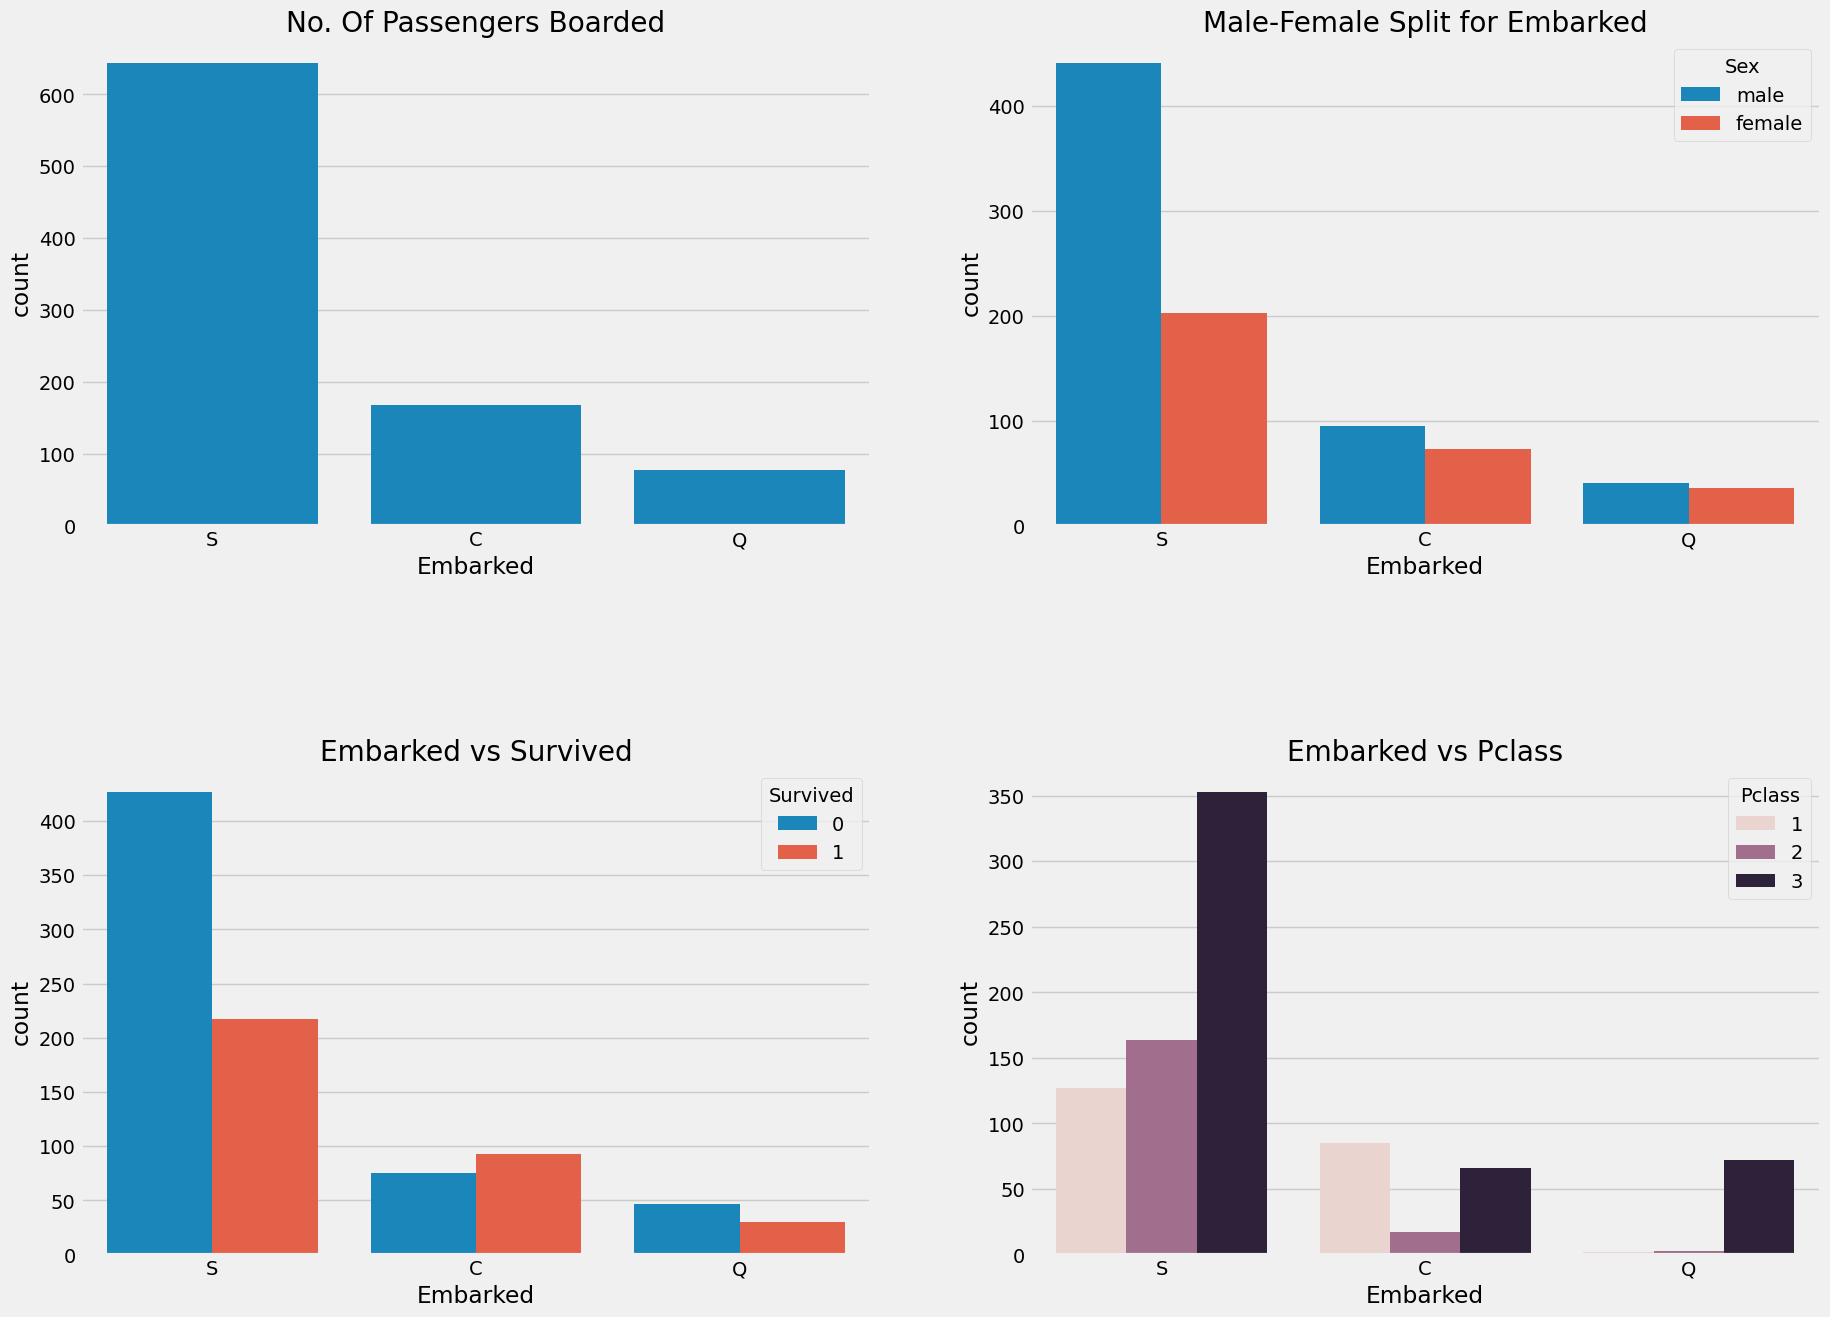

In [40]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

**Observations:**

1. Maximum passengers boarded from **S**; majority from **Pclass 3**.
2. Passengers from **C** had a higher survival rate, possibly due to the rescue of **Pclass 1** and **Pclass 2** passengers.
3. **Embark S**: Many wealthy passengers boarded, but survival chances were low (around **81%** of **Pclass 3** did not survive).
4. **Port Q**: Almost **95%** of passengers were from **Pclass 3**.

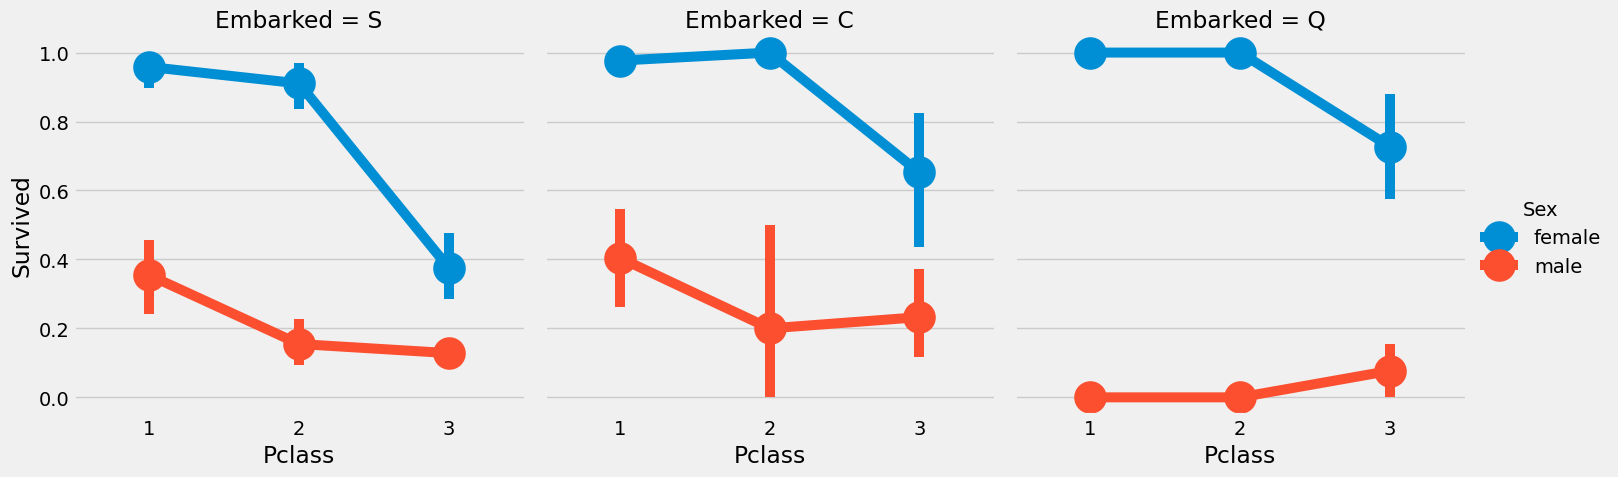

In [41]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data, kind='point')
plt.show()

**Observations:**

1. Survival chances for **women** in **Pclass 1** and **Pclass 2** are nearly **100%**.
2. **Port S**: Very low survival rate for **Pclass 3** passengers, both men and women.
3. **Port Q**: Extremely low survival for **men**, with almost all passengers from **Pclass 3**.


**Filling Embarked NaN** : Replace NaN values in the **Embarked** feature with **S**, since most passengers boarded from Port S.

In [42]:
data['Embarked'].fillna('S',inplace=True)

In [43]:
data.Embarked.isnull().any()# Finally No NaN values

False

### Pclass - Ordinal Feature

pclass: A proxy for socio-economic status (SES)

- `1st` = `Upper`
- `2nd` = `Middle`
- `3rd` = `Lower`

In [10]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


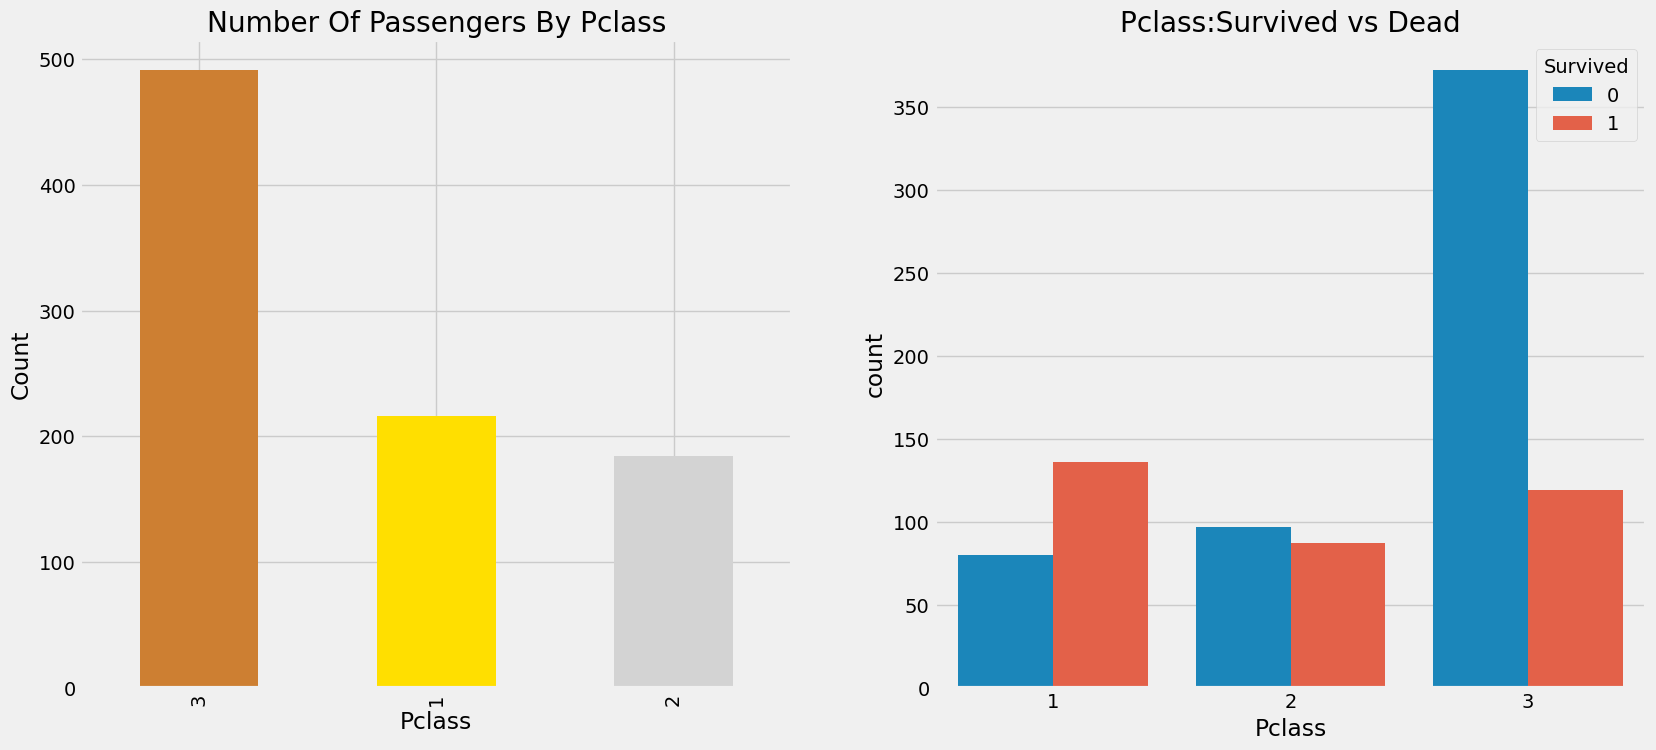

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x = 'Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- Passengers in Pclass 1 had a high priority during rescue.
- Survival rate for Pclass 1 is approximately 75%.
- Survival rate for Pclass 2 is around 50%.
- Only about 25% of Pclass 3 passengers survived.

In [12]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

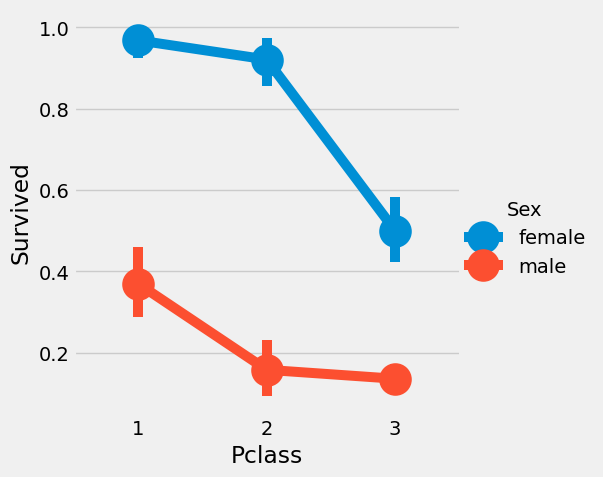

In [14]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

- Survival rate for **Women** in **Pclass 1** is about **95-96%**
- Women were prioritized for rescue across all **Pclass** categories
- Survival rate for **Men** in **Pclass 1** is significantly lower compared to women

### Age - Continous Feature

- Age is fractional if less than 1.
- If the age is estimated, is it in the form of xx.5


In [18]:
print('Oldest Passenger (Max Age):',data['Age'].max(),'Years')
print('Youngest Passenger (Min Age):',data['Age'].min(),'Years\n')
print('Average Age on the ship: {:.2f} Years'.format(data['Age'].mean()))

Oldest Passenger (Max Age): 80.0 Years
Youngest Passenger (Min Age): 0.42 Years

Average Age on the ship: 29.70 Years


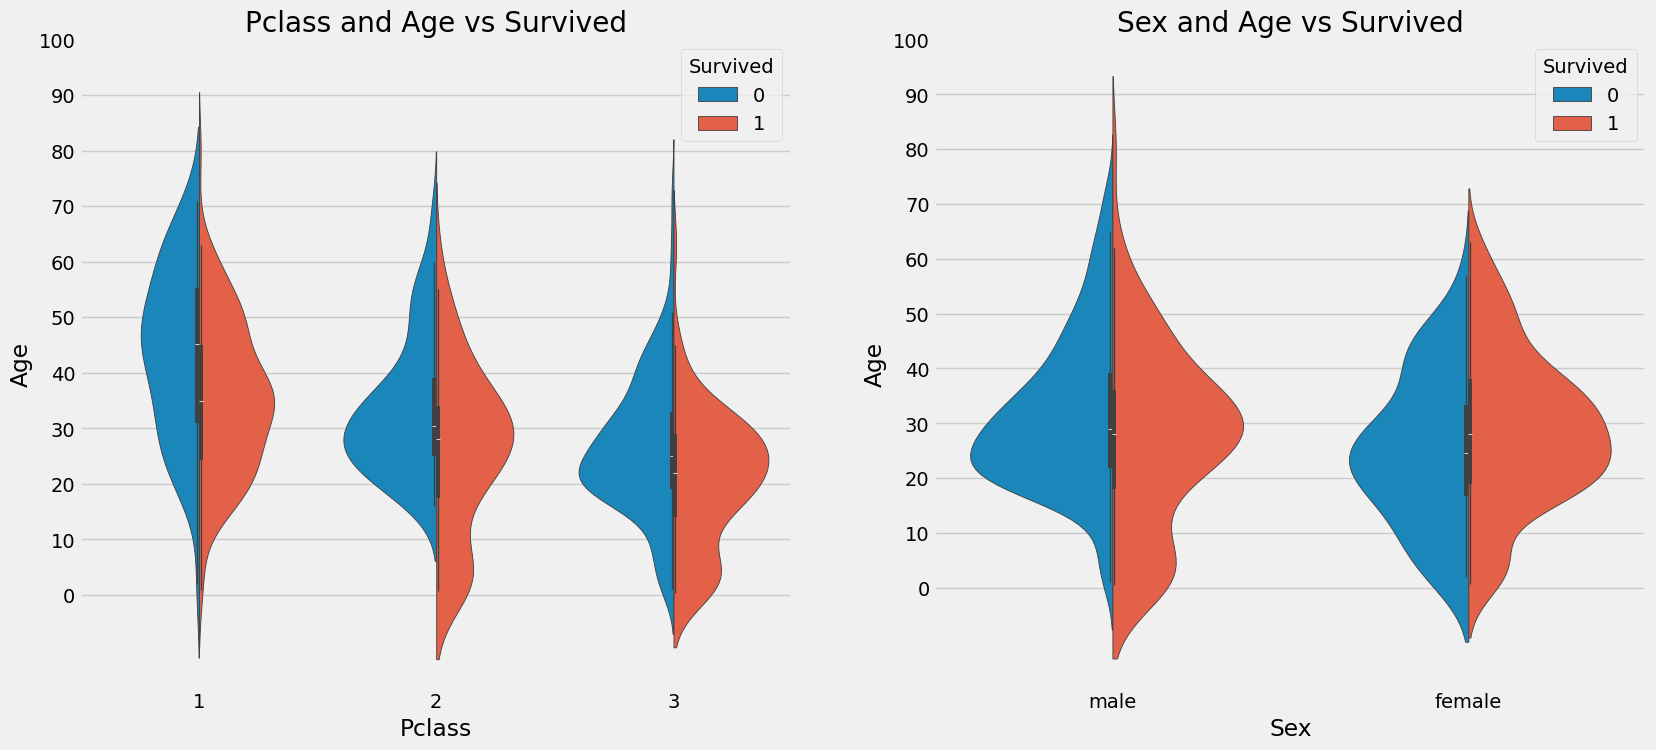

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**Observations:**

1. Number of **children** increases with **Pclass**; survival rate for passengers below **Age 10** is good across all **Pclass** categories.
2. Survival chances for passengers aged **20-50** in **Pclass 1** are high, especially for women.
3. For **males**, survival chances decrease with **age**.

#### Age Feature Handling:

1. The **Age** feature has **177** null values.
2. Replacing NaN values with the **mean age** (29 years) is not suitable for younger passengers (e.g., a 4-year-old).
3. We can use the **Name** feature to derive age bands.
4. Names contain salutations (e.g., **Mr**, **Mrs**), allowing us to assign mean ages based on these groups.

In [21]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

**Extracting Initials Using Regex:**

- We use the **Regex** pattern: **`[A-Za-z]+\.`**
- This pattern searches for:
  - Any sequence of letters (both uppercase and lowercase) followed by a **dot**.
- The result is the successful extraction of initials from the **Name** feature.

In [22]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Some initials like Mlle and Mme are not standard but can be grouped as Mlle and Mme will be replaced with Miss.

In [23]:
data['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
inplace=True)

In [24]:
data.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


**Filling NaN Ages**

In [25]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [26]:
data.Age.isnull().any() #no null values left finally

False

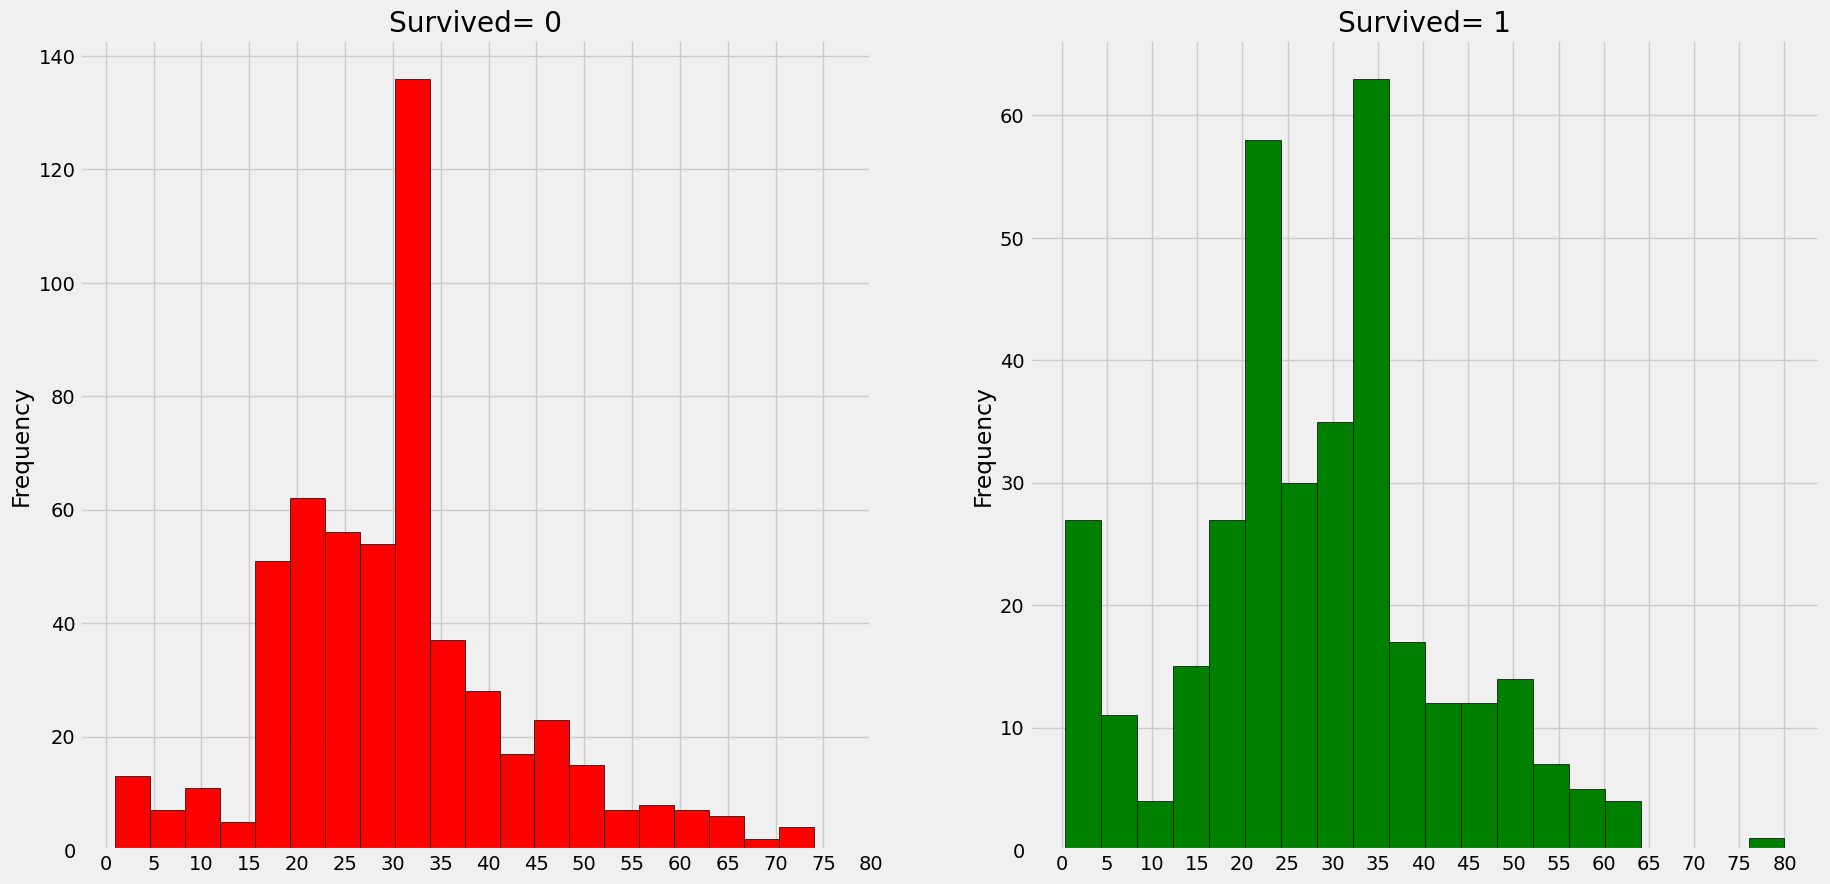

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

**Observations:**

1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

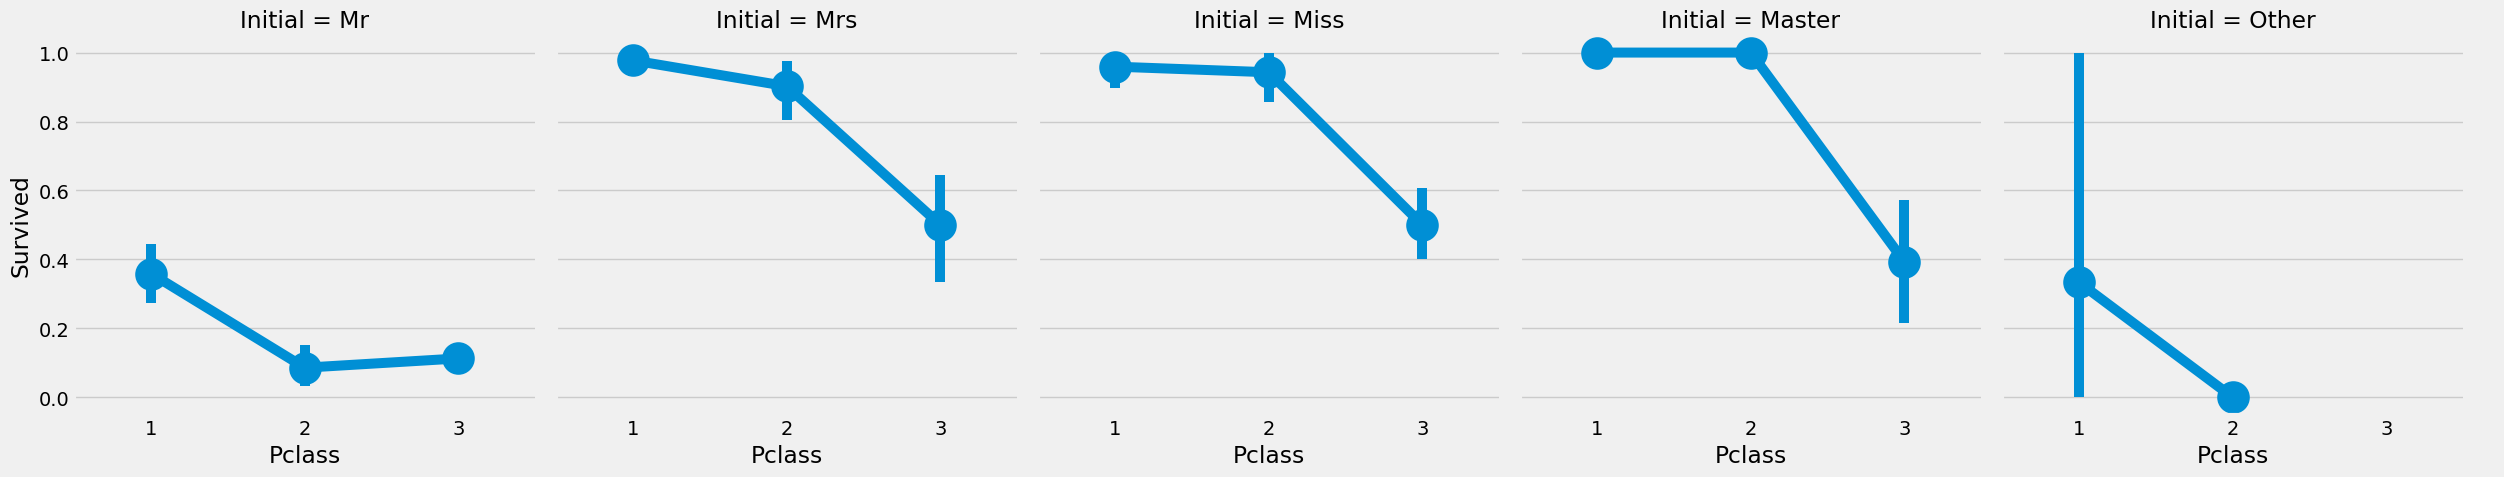

In [34]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

The Women and Child are first saved, and holds true irrespective of the class.

### Fare - Continous Feature

Passenger fare

In [63]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


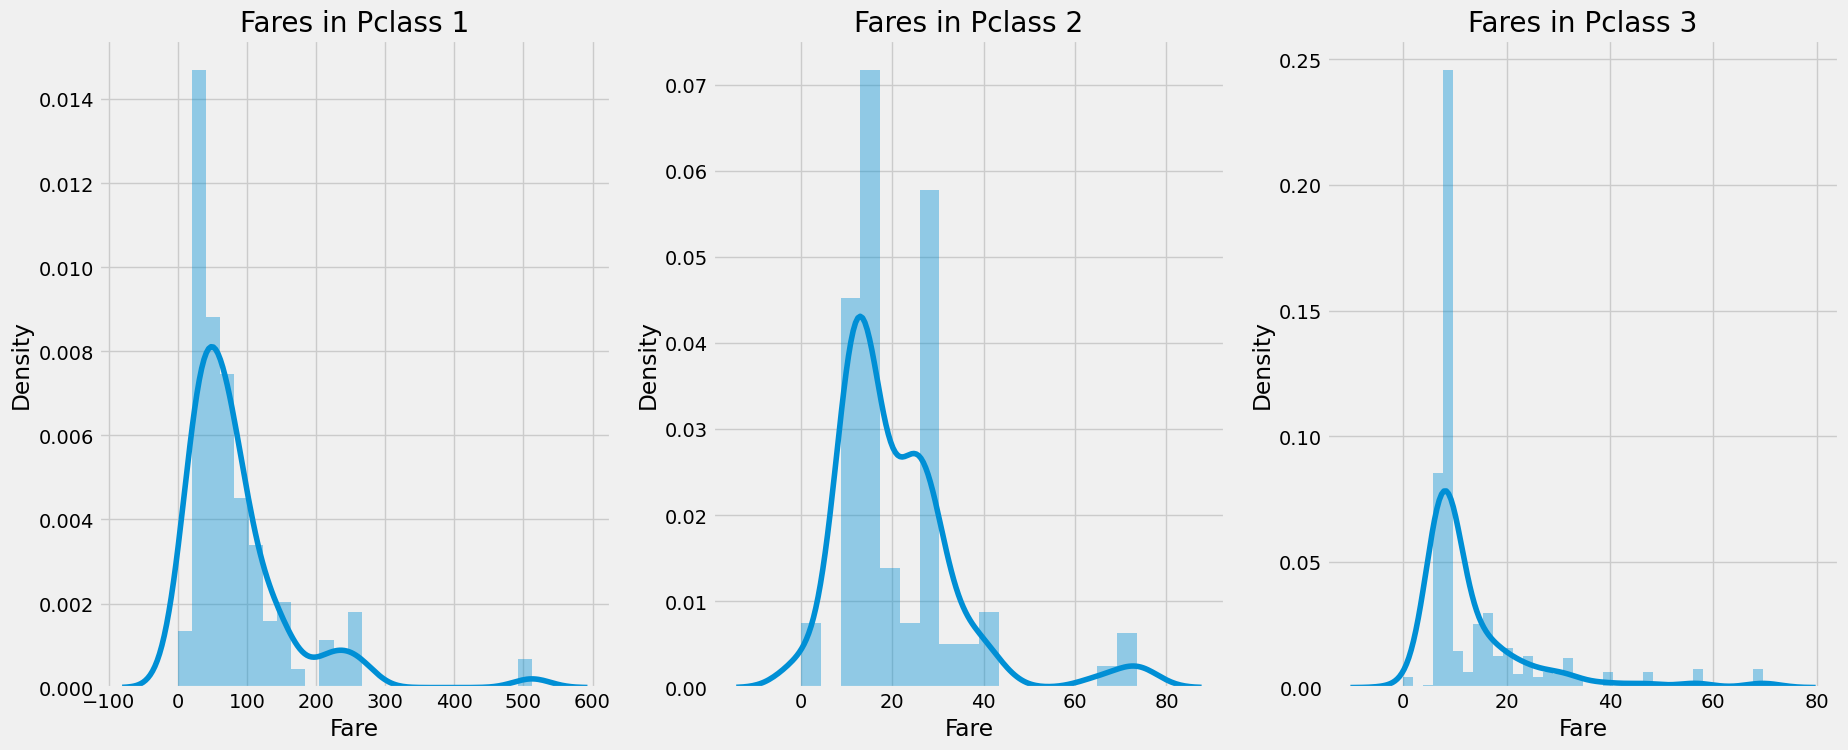

In [64]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There is a significant distribution of fares among passengers in **Pclass 1**, which decreases as the class standards lower. To convert this continuous variable into discrete values, we can use **binning**.

### SibSip - Discrete Feature

sibsp: The dataset defines family relations in this way...
- `Sibling` = brother, sister, stepbrother, stepsister
- `Spouse` = husband, wife (mistresses and fiancés were ignored)

In [44]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


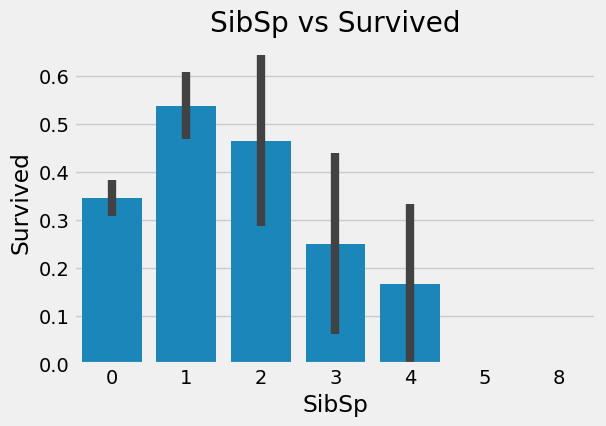

In [61]:
f, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax)
ax.set_title('SibSp vs Survived')
plt.show()

In [52]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Observations:**

1. Passengers alone (no siblings) have a **35% survival rate**.
2. Survival rate decreases with an increase in the number of siblings.
3. Passengers with families tend to prioritize saving their family members.
4. Families with **5-8 members** have a **0% survival rate**.
5. All individuals with **SibSp > 3** are in **Pclass 3**, indicating that large families in this class had low survival rates.

### Parch - Discrete Feature

parch: The dataset defines family relations in this way

- `Parent` = mother, father
- `Child` = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [53]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

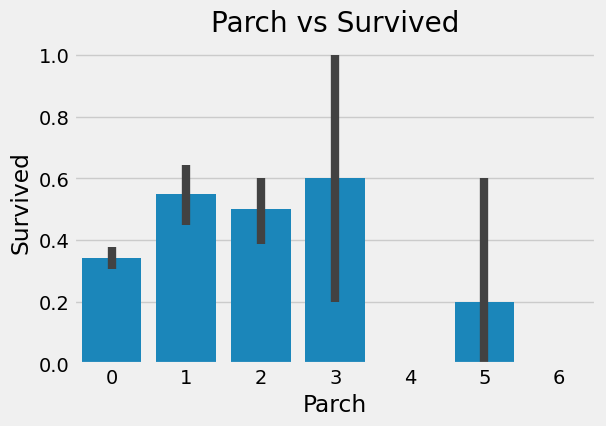

In [62]:
# First plot with barplot using plt.subplots
f, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.barplot(x='Parch', y='Survived', data=data, ax=ax)
ax.set_title('Parch vs Survived')
plt.show()

**Observations:**

1. Passengers with parents onboard have a **higher chance of survival**.
2. The survival rate is good for those with **1-3 parents** present.
3. Being alone is fatal; survival chances are low.
4. Survival chances decrease for passengers with **more than 4 parents** on the ship.

## Observations in a Nutshell for all features:
**Sex:** The chance of survival for women is high as compared to men.

**Pclass:**There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low**. For **women**, the chance of survival from **Pclass1** is almost 1 and is high too for those from **Pclass2**.   **Money Wins!!!**.

**Age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked:** This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.** Passengers at Q were all from **Pclass3**.

**Parch+SibSp:** Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

### Correlation Between The Features

In [71]:
numeric_columns = data.select_dtypes(include='number')
print(numeric_columns.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


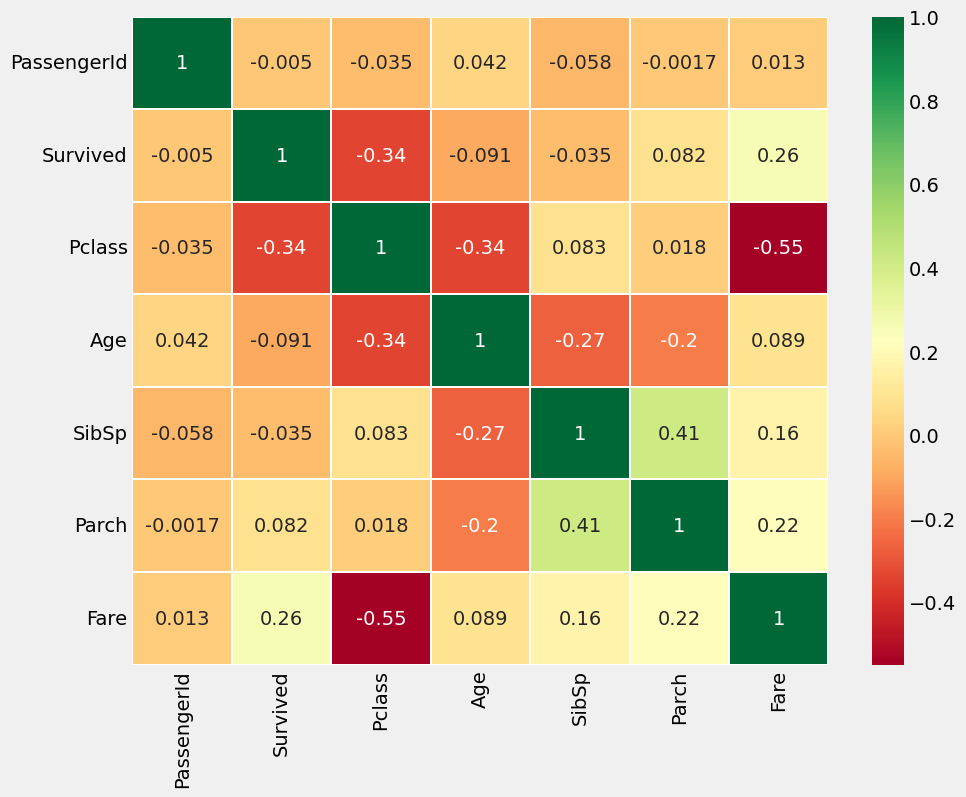

In [72]:
sns.heatmap(numeric_columns.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

**Interpreting The Heatmap**

- The heatmap shows that features are not significantly correlated.
- The highest correlation is between SibSp and Parch with a value of 0.41, suggesting some relationship but not enough to warrant removal of either feature.
- Since the features do not exhibit strong correlation, we can proceed with including all of them in the model.

#Feature Engineering and Data Cleaning

- **What is Feature Engineering?**
  - In a dataset, not all features are important. Some may be redundant and should be removed.
  - I can also create new features by extracting information from existing ones.
  - For example, I can get the "Initials" feature from the "Name" feature.
- I will look for new features to create, eliminate unnecessary ones, and transform relevant features into a suitable form for predictive modeling.

## Age

- Age is a continuous feature.
- I convert the continuous values into categorical values using binning, which groups a range of ages into a single category.
- The maximum age of a passenger was 80, so I will divide the range from 0 to 80 into 5 bins. This means each bin will be 16 years (80 divided by 5).

In [73]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [74]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


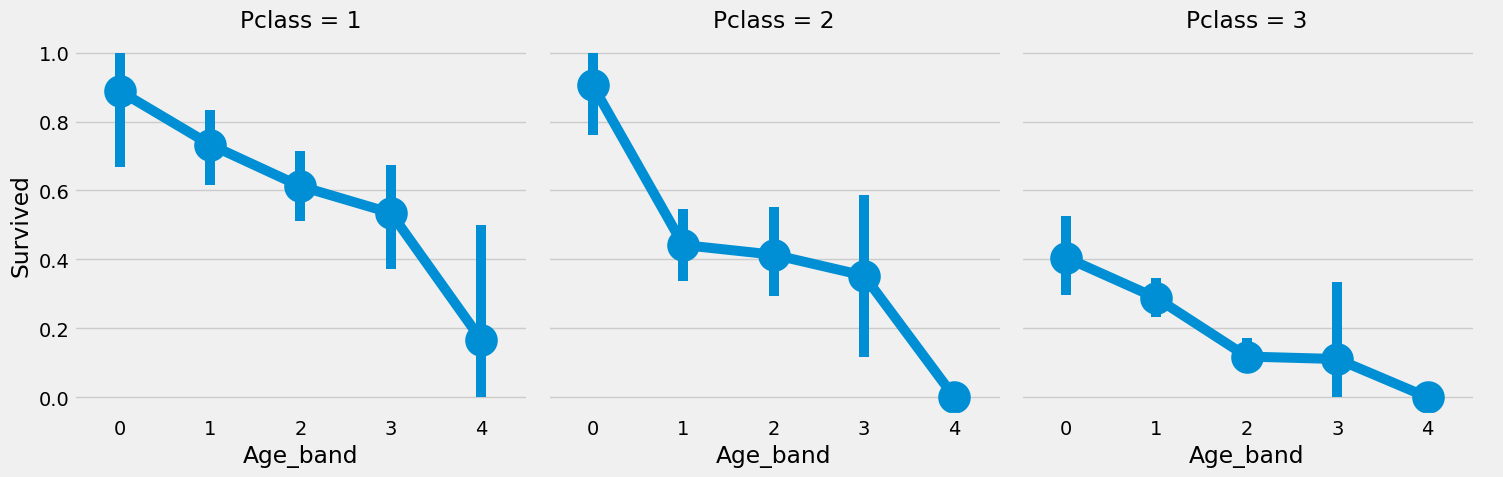

In [76]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass', kind='point')
plt.show()

**Observation:** I could see the survival rate decreases as the age increases irrespective of the Pclass

## Family_Size and Alone

- I will create two new features: "Family_Size" and "Alone."
- "Family_Size" is the sum of the "Parch" and "SibSp" features. This helps me check if the survival rate is related to the size of a passenger's family.
- The "Alone" feature indicates whether a passenger is alone or not.

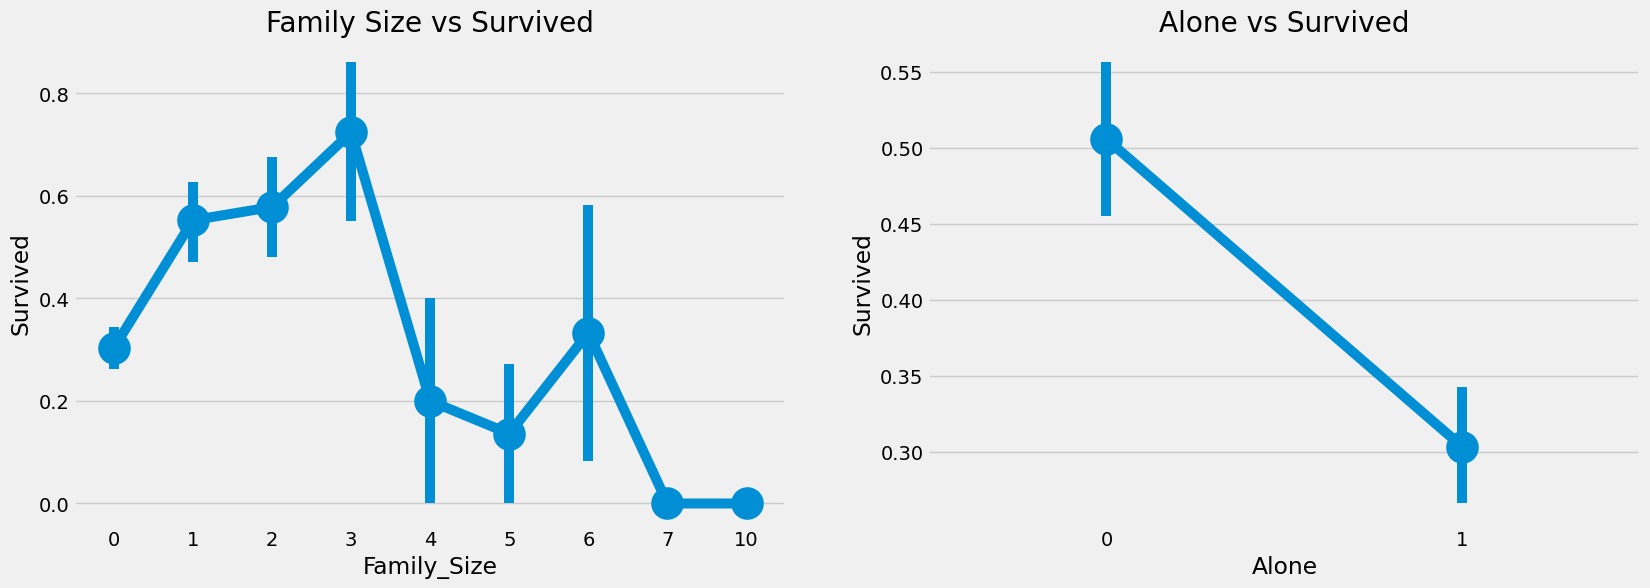

In [79]:
data['Family_Size'] = data['Parch'] + data['SibSp']  # Calculate family size
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family Size vs Survived')

sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

- Family_Size = 0 means the passenger is alone
- If a passenger is alone, the chances of survival are low.
- For family sizes greater than 4, the chances of survival decrease as well.

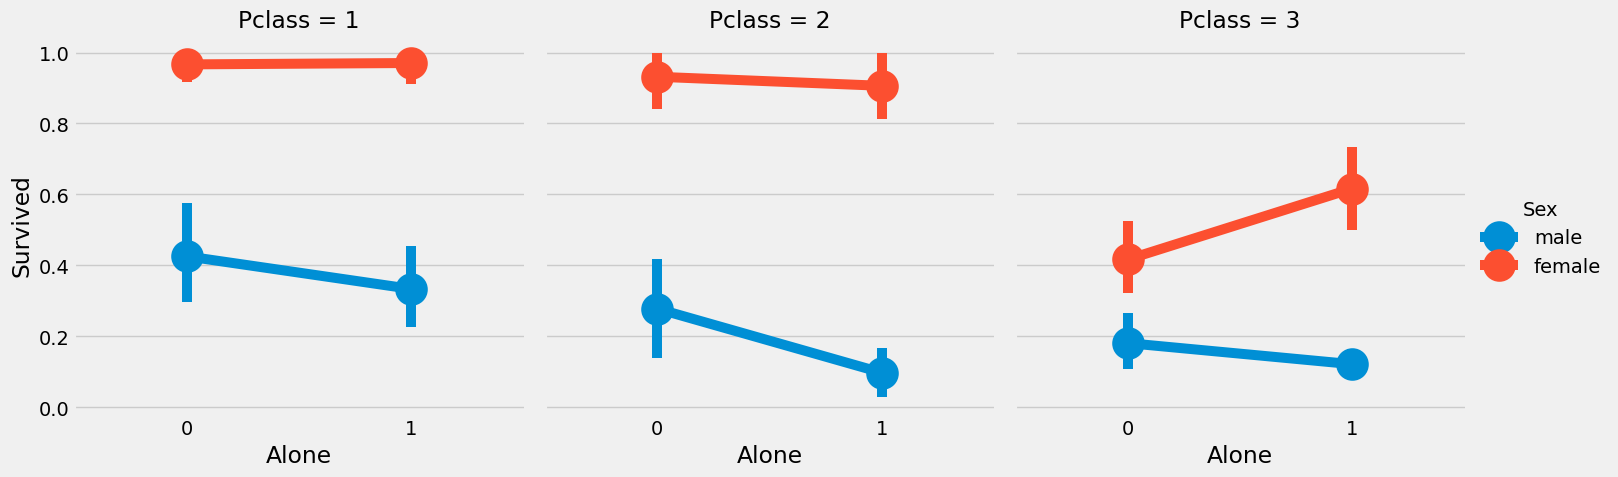

In [80]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

- It's clear that being alone negatively impacts survival, regardless of sex or Pclass.
- The only exception is Pclass 3, where alone females have a higher chance of survival than those with family.



## Fare_Range

- Since fare is a continuous feature, I need to convert it into an ordinal value using `pandas.qcut`.
- The `qcut` function splits the values into the specified number of bins.
- For example, if I specify 5 bins, it will evenly distribute the values into 5 separate bins or ranges.

In [81]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


It is clearly seen that as the **fare_range increases, the chances of survival increases.**

We should convert it into singleton values same as we did for **Age**

In [82]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

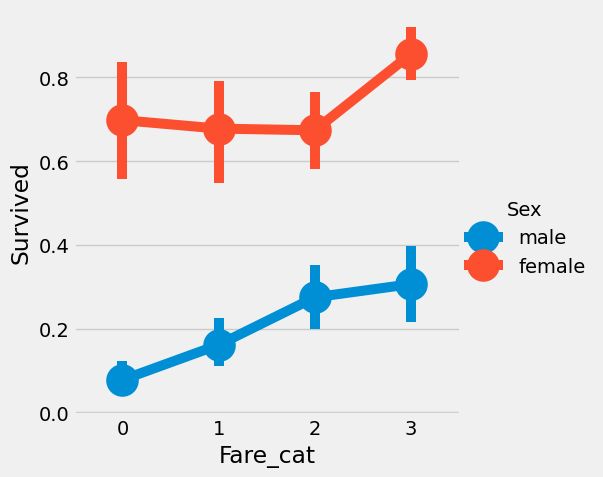

In [83]:
sns.catplot(x='Fare_cat',y='Survived',data=data,hue='Sex',kind='point')
plt.show()

- The `Fare_cat` increases, the survival chances increases.



## Converting String Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values.

In [84]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## Dropping Unneeded Features

- **Name**: Not needed as it can't be converted to a categorical value.
  
- **Age**: We already have the `Age_band` feature, so this is redundant.

- **Ticket**: It's just a random string and cannot be categorized.

- **Fare**: We have the `Fare_cat` feature, making this unnecessary.

- **Cabin**: Contains many NaN values, and passengers can have multiple cabins, so it's not useful.

- **Fare_Range**: We already have the `fare_cat` feature.

- **PassengerId**: Cannot be categorized.

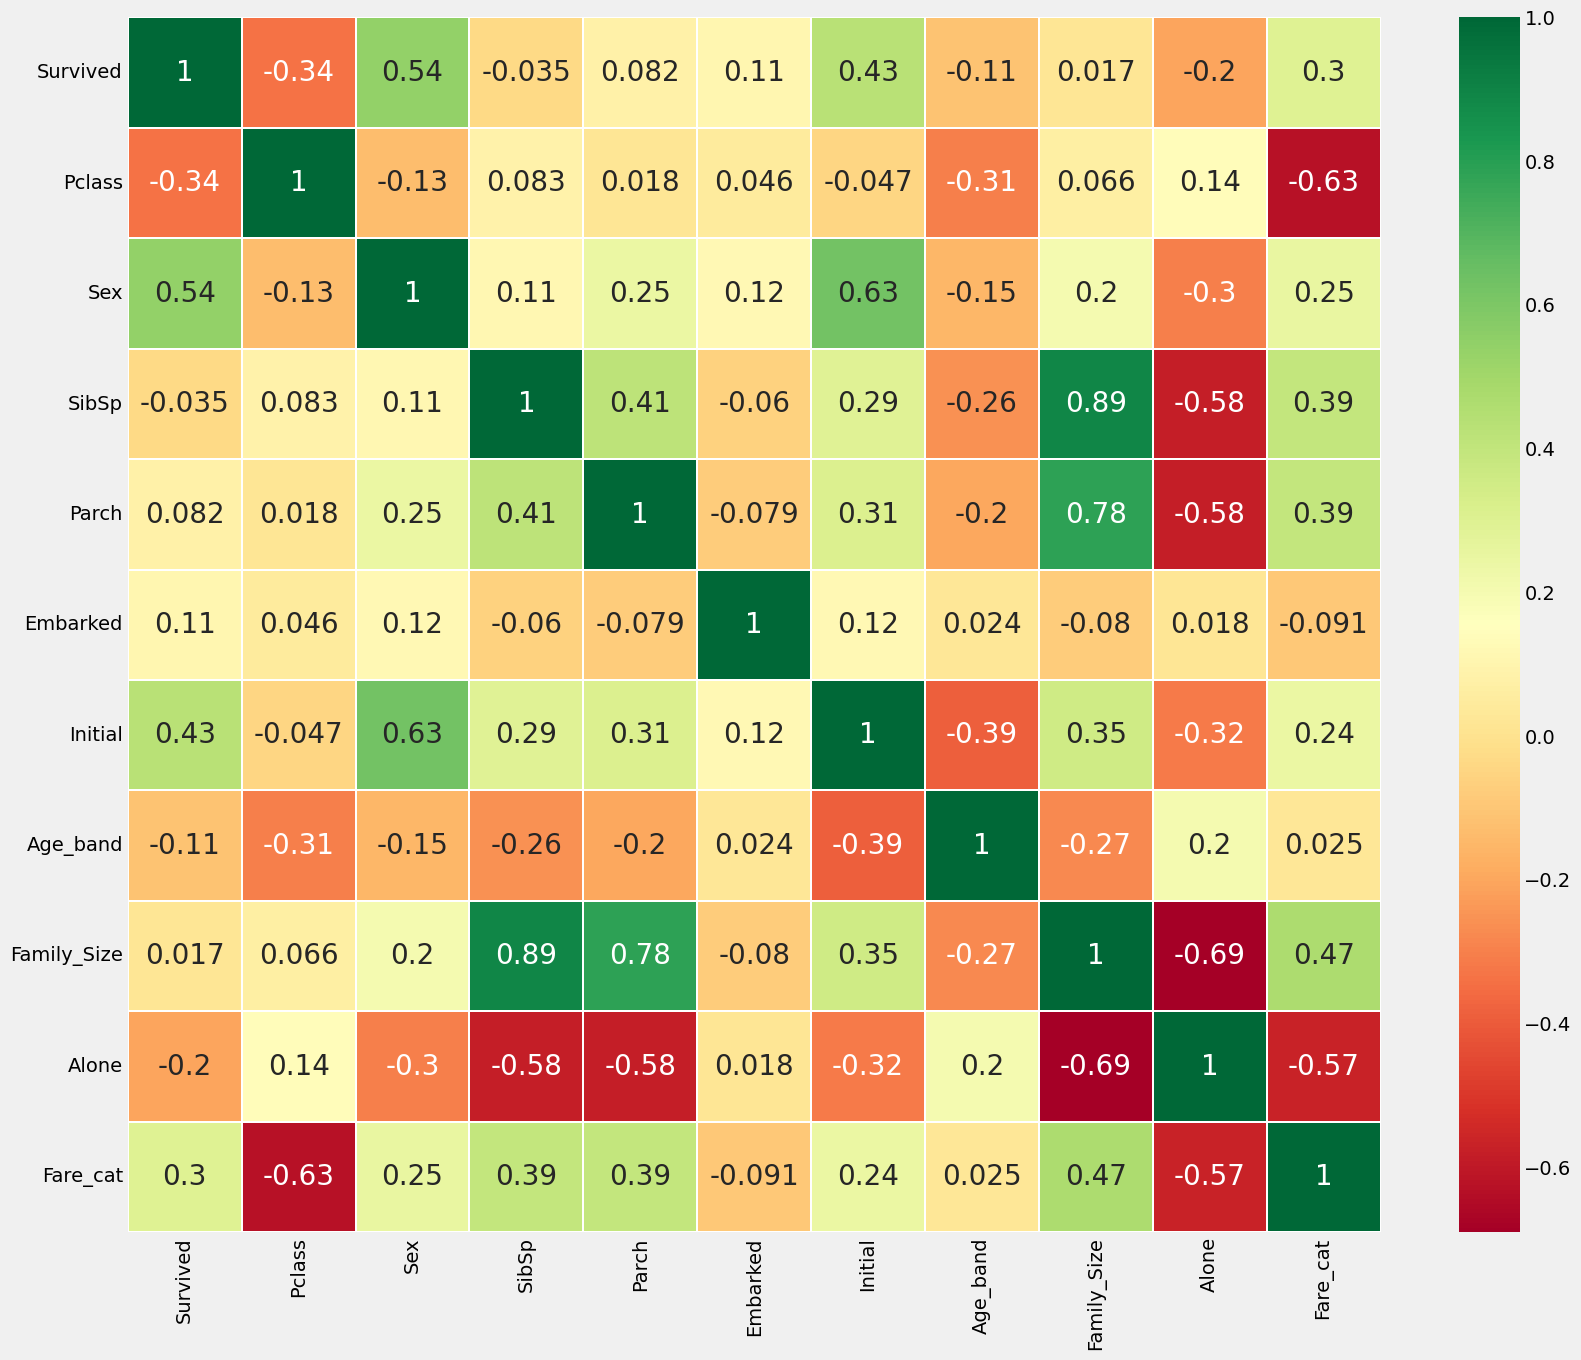

In [85]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#Predictive Modeling

- Classification algorithms to be used for prediction:
  1. Random Forest
  2. K-Nearest Neighbors (KNN)
  3. XGBoost

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [87]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### K-Nearest Neighbours(KNN)

In [101]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


### Random Forests

In [89]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


#### XGBoost

In [103]:
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
xgboost.fit(train_X, train_Y)
Y_pred = xgboost.predict(test_X)

accuracy = metrics.accuracy_score(test_Y, Y_pred)
print('The accuracy of the XGBoost Classifier is', accuracy)

The accuracy of the XGBoost Classifier is 0.8246268656716418


## Feature Importance

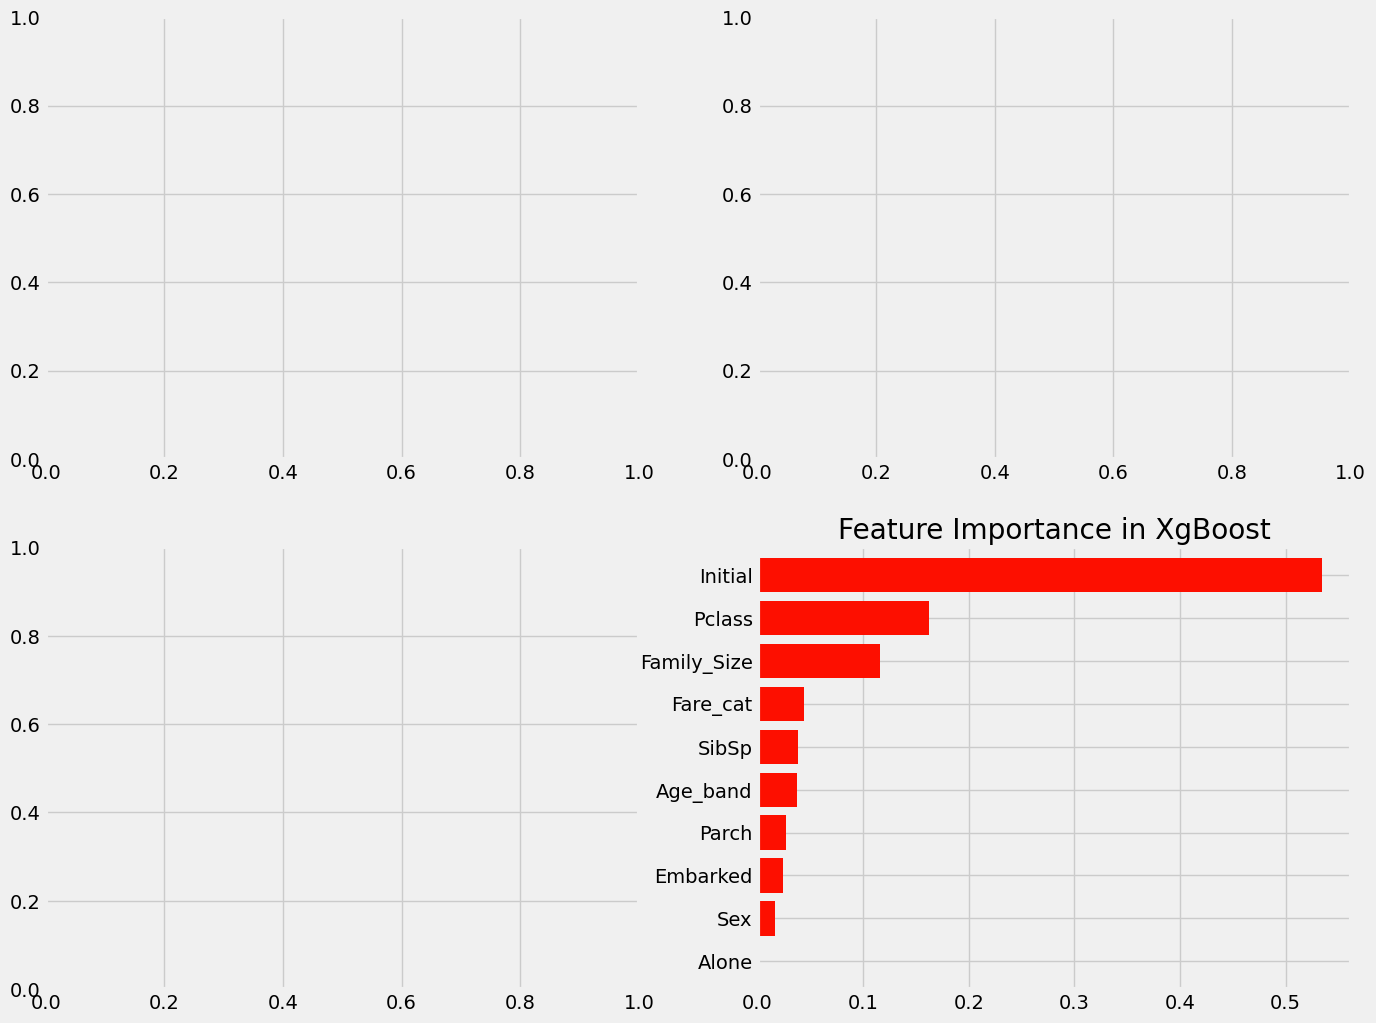

In [104]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

#### Observations:

1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.

I hope all of you did gain some insights to Machine Learning. Some other great notebooks for Machine Learning are:
1) For R:[Divide and Conquer by Oscar Takeshita](https://www.kaggle.com/pliptor/divide-and-conquer-0-82297/notebook)

2)For Python:[Pytanic by Heads and Tails](https://www.kaggle.com/headsortails/pytanic)

3)For Python:[Introduction to Ensembling/Stacking by Anisotropic](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

### Thanks a lot for having a look at this notebook. If you found this notebook useful, **Do Upvote**.
